Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [13]:
train = pd.read_csv("titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test = pd.read_csv("titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
def impute_age(cols):
    Age = cols.iloc[0] 
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        return train[train['Pclass']==Pclass]['Age'].mean()
    else:
        return Age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

<Axes: >

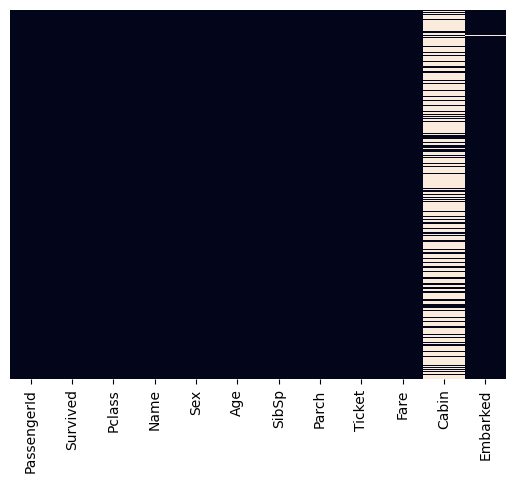

In [17]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [18]:
rfc = RandomForestClassifier(n_estimators= 300)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare']

In [21]:
X_train = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [22]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [23]:
Y_train = train['Survived']

In [24]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
output = pd.DataFrame({"PassengerID" : test.PassengerId, 'Survived': rfc_pred})
output.to_csv('submission.csv', index = False)

***